In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
batch_size = 164  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 80
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_63 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_64 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_65 (Activation)   (None, 14, 14, 128)     

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/80
50000/50000 [==============================] - 12s 242us/step - loss: 0.4988 - accuracy: 0.8253
Epoch 2/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.4422 - accuracy: 0.8442
Epoch 3/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.3911 - accuracy: 0.8626
Epoch 4/80
50000/50000 [==============================] - 12s 236us/step - loss: 0.3477 - accuracy: 0.8789
Epoch 5/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.3169 - accuracy: 0.8877
Epoch 6/80
50000/50000 [==============================] - 12s 236us/step - loss: 0.2854 - accuracy: 0.9000
Epoch 7/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.2618 - accuracy: 0.9087
Epoch 8/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.2427 - accuracy: 0.9152
Epoch 9/80
50000/50000 [==============================] - 12s 235us/step - loss: 0.2219 - accuracy: 0.9233
Epoch 10/80
50000/50000 [============

KeyboardInterrupt: ignored

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 13s 253us/step - loss: 0.1717 - accuracy: 0.9462 - val_loss: 1.2278 - val_accuracy: 0.7908
Epoch 2/80
50000/50000 [==============================] - 13s 257us/step - loss: 0.1763 - accuracy: 0.9463 - val_loss: 0.9856 - val_accuracy: 0.7803
Epoch 3/80
50000/50000 [==============================] - 13s 260us/step - loss: 0.1817 - accuracy: 0.9459 - val_loss: 1.0598 - val_accuracy: 0.7909
Epoch 4/80
50000/50000 [==============================] - 13s 252us/step - loss: 0.1737 - accuracy: 0.9467 - val_loss: 0.9828 - val_accuracy: 0.7868
Epoch 5/80
50000/50000 [==============================] - 13s 252us/step - loss: 0.1711 - accuracy: 0.9472 - val_loss: 0.8563 - val_accuracy: 0.7845
Epoch 6/80
50000/50000 [==============================] - 13s 252us/step - loss: 0.1784 - accuracy: 0.9472 - val_loss: 1.2495 - val_accuracy: 0.7883
Epoch 7/80
50000/50000 [===

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


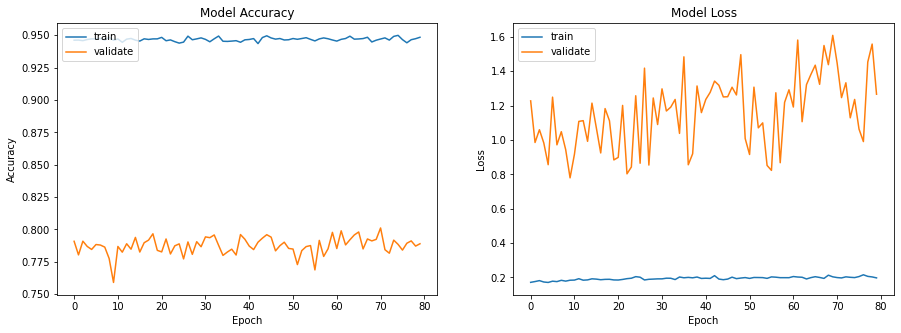

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)